# Word Embeddings

## Reflecting on one hot encoding.

Let's start with an example of one hot encoding and consider this simple movie dataset:


Movie | Tomato Rating | Genre | Rating | Length 
:---: | :---: | :---: | :---: | :---:  
First Man | 88 | Drama | PG-13 | 138
Can You Ever Forgive Me | 98 | Drama | R | 107
The Girl in the Spider's Web | 41 | Drama | R | -99
Free Solo | 99 | Documentary | PG-13 | 97
The Grinch | 57 | Animation | PG | 86
Overlord | 80 | Action | R | 109
Christopher Robin | 71 | Comedy | PG | -99
Ant Man and the Wasp  |  88 | Science Fiction | PG-13 | 118

Numeric columns like `Tomato Rating` and `Length` are fine as is but categorical columns (`Genre` and `Rating`) are problematic for machine learning. Simply converting the category values to integers:


Movie | Tomato Rating | Genre | Rating | Length 
:---: | :---: | :---: | :---: | :---:  
First Man | 88 | 5 | 2  | 138
Can You Ever Forgive Me | 98 | 5 | 3 | 107
The Girl in the Spider's Web | 41 | 5 | 3 | -99
Free Solo | 99 | 4 | 2 | 97
The Grinch | 57 | 2 | 1 | 86
Overlord | 80 | 1 | 3 | 109
Christopher Robin | 71 | 3 | 1 | -99
Ant Man and the Wasp  |  88 | 6 | 2 | 118

isn't the answer because that would imply that action (1) is closer to animation (2) than science fiction (6). The solution in this case is to one-hot-encode.



After we one hot encode this we get something like:

Movie            | Tomato Rating | Action | Animation | Comedy | Documentary | Drama | Science Fiction | PG | PG-13 | R | Length 
:---: | :---: | :---: | :---: | :---: |  :---: |  :---: |  :---: |  :---: |  :---: |  :---: |  :---: 
First Man        | 88            |  0     |    0      |   0    | 0           | 1     | 0    | 0 | 1  |    0| 138
Can You Ever Forgive Me | 98 |      0     |    0      |   0    | 0           | 1     | 0    | 0 | 0  |   1|   107
The Girl in the Spider's Web | 41 |  0     |    0      |   0    | 0           | 1     | 0    | 0 | 1  |    0|    -99
Free Solo | 99 |  0     |    0      |   0    | 1           | 0     | 0    | 0 | 1  |    0|   97
The Grinch | 57 |  0     |    1      |   0    | 0           | 0     | 0    | 1 | 0  |    0| 86
Overlord | 80 |  1     |    0      |   0    | 0           | 0     | 0    | 0 | 1  |    0|  109
Christopher Robin | 71  |  0     |    0      |   1   | 0           | 0     | 0    | 1 | 0  |    0| -99
Ant Man and the Wasp   |  0    |    0      |   0    | 0       | 0    | 0     | 1    | 0 | 1  |    0| 118


**This is the correct approach for this example.**
However, that's a fairly sparse matrix meaning most of the entries are zero. When we one hot encode words in a text document, the matrices are even more sparse. Here is why. Each column represents a word in our vocabulary. That's important so I will write it again: **Each column represents a word in our vocabulary.** We might have 10,000 columns. (The average passive vocabulary of an English speaker is about 40,000 words.) If the first word of our text is word 5,791, then there would be a `1` in that column and a `0` in all the other 9,999 columns. This is shown in the left image below. 

![word embeddings vs. one hot encoding](https://s3.amazonaws.com/book.keras.io/img/ch6/word_embeddings.png)

Instead of the 4 black columns imagine 1,000, 10,00 or more!

### A bit of natural language processing history
Pre-2000s there was an active research push to create by hand machine readable ontologies. For example, a pianist would be categorized as an instrumentalist, a musician, a human, an animal, a living being, and a physical object. Swimming and floating would have similar attributes but swimming has an agentive quality. The idea was that these ontologies would help in a variety of natural language processing tasks from information retrieval to machine translation.  You can imagine a similar thing being done automatically by analyzing a large corpus. For example, 

     embarking on a solo career, the pianist performed LIVE from the
     The 36-year-old concert pianist performed for students in Vicenza
     the legendary pianist performed for Sweetwater's Grand Opening of 
     acclaimed classical pianist, performed at Chestnut Hill College recently
     ---
     the jazz pianist played with his trio
     the New York-West Stockbridge pianist played a concise program in which 
     The pianist played several encores.
     
     In the next 43 minutes, as the violinist performed six classical pieces
     The talented young violinist performed with pianist Lianhua Chi.
     The violinist performed at the boarding gate for a Delta flight to Brussels, 
     where the violinist performed the Korngold concerto with the Johannesburg
     ---
     The violinist played a Hungarian folk song in honour of the Holy Father. 
     Russian-born violinist, played some of Bach's solo violin sonatas and partitas in a 
     a professional violinist played the theme live.
     
From the above, you can see that the words *pianist* and *violinist* occur in the same context and can be seen as sharing similar semantics. Thus, we could write a program that would automatically map words to 200 or 1000 latent categories. *Latent* simply means 'hidden' meaning that we don't specify what those categories are... the program automatically determines these categories.

This approach is called **word embeddings**. So instead of

 word | dog    | hill | man   | on    | saw   | telescope | the   | with
 ---: | :---: | :---: | :---: | :---: | :---: | :---:     | :---: | :---:  
 word 1 | 0   |   0   |   0   |   0   |  0    |   0       | 1     | 0
 word 2 | 0   |   0   |   1   |   0   |  0    |   0       | 0     | 0
 word 3 | 0   |   0   |   0   |   0   |  1    |   0       | 0     | 0
 word 4 | 0   |   0   |   0   |   0   |  0    |   0       | 1     | 0
 word 5 | 1   |   0   |   0   |   0   |  0    |   0       | 0     | 0
 word 6 | 0   |   0   |   0   |   1   |  0    |   0       | 0     | 0
 word 7 | 0   |   0   |   0   |   0   |  0    |   0       | 1     | 0
 word 8 | 0   |   1   |   0   |   0   |  0    |   0       | 0     | 0 
 word 9 | 0   |   0   |   0   |   0   |  0    |   0       | 0     | 1 
 word 10 | 0   |   0   |   0   |   0   |  0    |   0       | 1     | 0 
 word 11 | 0   |   0   |   0   |   0   |  0    |   1       | 0     | 0

(where word 1 is the first word in a sentence, word 2 the second), which is one hot encoding, we get something like (where *lf* stands for latent feature):

word    | LF1    | LF2     | LF3      | LF4       | LF5      | LF6    | LF7      | LF8
 ---:   | :---:  | :---:    | :---:    | :---:    | :---:    | :---:        | :---:    | :---:  
 word 1 | 0.01   |   0.03   |   0.01   |   0.15   |  0.08    |   0.04       | 0.21     | 0.13
 word 2 | 0.47   |   0.21   |   0.88   |   0.05   |  0.09    |   0.21       | 0.01     | 0.03
 word 3 | 0.05   |   0.01   |   0.13   |   0.06   |  0.76    |   0.21       | 0.02     | 0.04
 word 4 | 0.01   |   0.03   |   0.01   |   0.15   |  0.08    |   0.04       | 0.21     | 0.13
 word 5 | 0.81   |   0.21   |   0.46   |   0.09   |  0.11    |   0.01       | 0.01     | 0.00
 word 6 | 0.13   |   0.27   |   0.15   |   0.66   |  0.04    |   0.06       | 0.09     | 0.31
 word 7 | 0.01   |   0.03   |   0.01   |   0.15   |  0.08    |   0.04       | 0.21     | 0.13
 word 8 | 0.21   |   0.91   |   0.21   |   0.17   |  0.05    |   0.05       | 0.21     | 0.11
 word 9 | 0.05   |   0.01   |   0.11   |   0.41   |  0.14    |   0.11       | 0.29     | 0.88
 word 10 | 0.01   |   0.03   |   0.01   |   0.15   |  0.08    |   0.04       | 0.21     | 0.13
 word 11 | 0.33   |   0.17   |   0.37   |   0.11   |  0.41    |   0.78       | 0.03     | 0.10
 
 
 Keep in mind that this is a toy example. A more typical example might have a one hot encoding representation of 10,000 columns or more (representing a vocabulary of 10,000 most frequent words in the text). This is a **sparse** representation.  The word embedding method might have 200 to 1,000 columns which can represent a much larger vocabulary. This is a **dense** representation.
 
 
Once again, while the vectors obtained through one-hot encoding are binary, sparse (mostly made of zeros) and very high-dimensional (same dimensionality as the 
number of words in the vocabulary), "word embeddings" are low-dimensional floating point vectors 
(i.e. "dense" vectors, as opposed to sparse vectors). 
Unlike word vectors obtained via one-hot encoding, word embeddings are learned from data. 
It is common to see word embeddings that are 256-dimensional, 512-dimensional, or 1024-dimensional when dealing with very large vocabularies. 
On the other hand, one-hot encoding words generally leads to vectors that are 20,000-dimensional or higher (capturing a vocabulary of 20,000 
token in this case). So, word embeddings pack more information into far fewer dimensions. 

There are two ways to obtain word embeddings:

* Learn word embeddings jointly with the main task you care about (e.g. document classification or sentiment prediction). 
In this setup, you would start with random word vectors, then learn your word vectors in the same way that you learn the weights of a neural network.
* Load into your model word embeddings that were pre-computed using a different machine learning task than the one you are trying to solve. 
These are called "pre-trained word embeddings". 

Let's take a look at both.

## Learning word embeddings with the `Embedding` layer


The simplest way to associate a dense vector to a word would be to pick the vector at random. The problem with this approach is that the 
resulting embedding space would have no structure: for instance, the words "accurate" and "exact" may end up with completely different 
embeddings, even though they are interchangeable in most sentences. It would be very difficult for a deep neural network to make sense of 
such a noisy, unstructured embedding space. 

To get a bit more abstract: the geometric relationships between word vectors should reflect the semantic relationships between these words. 
Word embeddings are meant to map human language into a geometric space. For instance, in a reasonable embedding space, we would expect 
synonyms to be embedded into similar word vectors, and in general we would expect the geometric distance (e.g. L2 distance) between any two 
word vectors to relate to the semantic distance of the associated words (words meaning very different things would be embedded to points 
far away from each other, while related words would be closer). Even beyond mere distance, we may want specific __directions__ in the 
embedding space to be meaningful. 

[...]


In real-world word embedding spaces, common examples of meaningful geometric transformations are "gender vectors" and "plural vector". For 
instance, by adding a "female vector" to the vector "king", one obtain the vector "queen". By adding a "plural vector", one obtain "kings". 
Word embedding spaces typically feature thousands of such interpretable and potentially useful vectors.

Is there some "ideal" word embedding space that would perfectly map human language and could be used for any natural language processing 
task? Possibly, but in any case, we have yet to compute anything of the sort. Also, there isn't such a thing as "human language", there are 
many different languages and they are not isomorphic, as a language is the reflection of a specific culture and a specific context. But more 
pragmatically, what makes a good word embedding space depends heavily on your task: the perfect word embedding space for an 
English-language movie review sentiment analysis model may look very different from the perfect embedding space for an English-language 
legal document classification model, because the importance of certain semantic relationships varies from task to task.

It is thus reasonable to __learn__ a new embedding space with every new task. Thankfully, backpropagation makes this really easy, and Keras makes it 
even easier. It's just about learning the weights of a layer: the `Embedding` layer.

In [1]:
from keras.layers import Embedding

# The Embedding layer takes at least two arguments:
# the number of possible tokens, here 1000 (1 + maximum word index),
# and the dimensionality of the embeddings, here 64.
embedding_layer = Embedding(1000, 64)

Using TensorFlow backend.


The `Embedding` layer is best understood as a dictionary mapping integer indices (which stand for specific words) to dense vectors. It takes 
as input integers, it looks up these integers into an internal dictionary, and it returns the associated vectors. It's effectively a dictionary lookup.

The `Embedding` layer takes as input a 2D tensor of integers, of shape `(samples, sequence_length)`, where each entry is a sequence of 
integers. It can embed sequences of variable lengths, so for instance we could feed into our embedding layer above batches that could have 
shapes `(32, 10)` (batch of 32 sequences of length 10) or `(64, 15)` (batch of 64 sequences of length 15). All sequences in a batch must 
have the same length, though (since we need to pack them into a single tensor), so sequences that are shorter than others should be padded 
with zeros, and sequences that are longer should be truncated.

This layer returns a 3D floating point tensor, of shape `(samples, sequence_length, embedding_dimensionality)`. Such a 3D tensor can then 
be processed by a  1D convolution layer, which will be introduced in the next section.

When you instantiate an `Embedding` layer, its weights (its internal dictionary of token vectors) are initially random, just like with any 
other layer. During training, these word vectors will be gradually adjusted via backpropagation, structuring the space into something that the 
downstream model can exploit. Once fully trained, your embedding space will show a lot of structure -- a kind of structure specialized for 
the specific problem you were training your model for.

Let's apply this idea to the IMDB movie review sentiment prediction task. 

## The IMDB dataset


We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 
reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

Why do we have these two separate training and test sets? You should never test a machine learning model on the same data that you used to 
train it! Just because a model performs well on its training data doesn't mean that it will perform well on data it has never seen, and 
what you actually care about is your model's performance on new data (since you already know the labels of your training data -- obviously 
you don't need your model to predict those). For instance, it is possible that your model could end up merely _memorizing_ a mapping between 
your training samples and their targets -- which would be completely useless for the task of predicting targets for data never seen before. 


The IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) 
have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The following code will load the dataset (when you run it for the first time, about 80MB of data will be downloaded to your machine):

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words 
will be discarded. This allows us to work with vector data of manageable size.

The variables `train_data` and `test_data` are lists of reviews, each review being a list of word indices (encoding a sequence of words). 
`train_labels` and `test_labels` are lists of 0s and 1s, where 0 stands for "negative" and 1 stands for "positive":

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

In [5]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here's how you can quickly decode one of these reviews back to English words:

In [6]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

Let's prepare the data.  We will restrict the movie reviews to the top 10,000 most common words, 
and cut the reviews after 100 words. Our network will simply learn 8-dimensional embeddings for each of the 10,000 words, turn the 
input integer sequences (2D integer tensor) into embedded sequences (3D float tensor), flatten the tensor to 2D, and train a single `Dense` 
layer on top for classification.

In [8]:
from keras.datasets import imdb
from keras import preprocessing

# Number of words to consider as features
max_features = 10000
# Cut texts after this number of words 
# (among top max_features most common words)
maxlen = 100

# Load the data as lists of integers.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# This turns our lists of integers
# into a 2D integer tensor of shape `(samples, maxlen)`
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
model.add(Embedding(10000, 8, input_length=maxlen))
# After the Embedding layer, 
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings 
# into a 2D tensor of shape `(samples, maxlen * 8)`
model.add(Flatten())

# We add the classifier on top
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 801       
Total params: 80,801
Trainable params: 80,801
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 87us/step - loss: 0.6226 - acc: 0.6764 - val_loss: 0.4761 - val_acc: 0.8038
Epoch 2/10
20000/20000 [==============================] - 1s 53us/step - loss: 0.3736 - acc: 0.8502 - val_loss: 0.3532 - val_acc: 0.8464
Epoch 3/10
20000/20000 [==============================] - 1s 57us/step - loss: 

We get to a validation accuracy of ~85%, which is pretty good considering that we only look at the first 100 words in every review. But 
note that merely flattening the embedded sequences and training a single `Dense` layer on top leads to a model that treats each word in the 
input sequence separately, without considering inter-word relationships and structure sentence (e.g. it would likely treat both _"this movie 
is shit"_ and _"this movie is the shit"_ as being negative "reviews"). It would be much better to add  1D convolutional 
layers on top of the embedded sequences to learn features that take into account each sequence as a whole. That's what we will focus on in 
the next few sections.

## Using pre-trained word embeddings


Sometimes, you have so little training data available that could never use your data alone to learn an appropriate task-specific embedding 
of your vocabulary. What to do then?

Instead of learning word embeddings jointly with the problem you want to solve, you could be loading embedding vectors from a pre-computed 
embedding space known to be highly structured and to exhibit useful properties -- that captures generic aspects of language structure. The 
rationale behind using pre-trained word embeddings in natural language processing is very much the same as for using pre-trained convnets 
in image classification: we don't have enough data available to learn truly powerful features on our own, but we expect the features that 
we need to be fairly generic, i.e. common visual features or semantic features. In this case it makes sense to reuse features learned on a 
different problem.

Such word embeddings are generally computed using word occurrence statistics (observations about what words co-occur in sentences or 
documents), using a variety of techniques, some involving neural networks, others not. The idea of a dense, low-dimensional embedding space 
for words, computed in an unsupervised way, was initially explored by Bengio et al. in the early 2000s, but it only started really taking 
off in research and industry applications after the release of one of the most famous and successful word embedding scheme: the Word2Vec 
algorithm, developed by Mikolov at Google in 2013. Word2Vec dimensions capture specific semantic properties, e.g. gender.

There are various pre-computed databases of word embeddings that can download and start using in a Keras `Embedding` layer. Word2Vec is one 
of them. Another popular one is called "GloVe", developed by Stanford researchers in 2014. It stands for "Global Vectors for Word 
Representation", and it is an embedding technique based on factorizing a matrix of word co-occurrence statistics. Its developers have made 
available pre-computed embeddings for millions of English tokens, obtained from Wikipedia data or from Common Crawl data.

Let's take a look at how you can get started using GloVe embeddings in a Keras model. The same method will of course be valid for Word2Vec 
embeddings or any other word embedding database that you can download. We will also use this example to refresh the text tokenization 
techniques we introduced a few paragraphs ago: we will start from raw text, and work our way up.

## Putting it all together: from raw text to word embeddings


We will be using a model similar to the one we just went over -- embedding sentences in sequences of vectors, flattening them and training a 
`Dense` layer on top. But we will do it using pre-trained word embeddings, and instead of using the pre-tokenized IMDB data packaged in 
Keras, we will start from scratch, by downloading the original text data.

### Download the IMDB data as raw text


First, head to `http://ai.stanford.edu/~amaas/data/sentiment/` and download the raw IMDB dataset (if the URL isn't working anymore, just 
Google "IMDB dataset"). Uncompress it.

Now let's collect the individual training reviews into a list of strings, one string per review, and let's also collect the review labels 
(positive / negative) into a `labels` list:

In [10]:
import os

imdb_dir = '/home/skool/data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

### Tokenize the data


Let's vectorize the texts we collected, and prepare a training and validation split.
We will merely be using the concepts we introduced earlier in this section.

Because pre-trained word embeddings are meant to be particularly useful on problems where little training data is available (otherwise, 
task-specific embeddings are likely to outperform them), we will add the following twist: we restrict the training data to its first 200 
samples. So we will be learning to classify movie reviews after looking at just 200 examples...


In [11]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


### Download the GloVe word embeddings


Head to `https://nlp.stanford.edu/projects/glove/` (where you can learn more about the GloVe algorithm), and download the pre-computed 
embeddings from 2014 English Wikipedia. It's a 822MB zip file named `glove.6B.zip`, containing 100-dimensional embedding vectors for 
400,000 words (or non-word tokens). Un-zip it.

### Pre-process the embeddings


Let's parse the un-zipped file (it's a `txt` file) to build an index mapping words (as strings) to their vector representation (as number 
vectors).

In [12]:
glove_dir = '/home/skool/data/glove'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


## You can do it.   10xp

#### Part 1 5xp
If the embeddings truly represent the semanatics, then we would think semantically similar words like *doctor* and *physician* would have similar looking vectors compared to *doctor* to *chair*.  We have used `pyplot` before so we should be able to do this. Can you create two **line** plots.

1. One showing the semantics of *doctor* and *physician*
2. The other showing the semantics of *doctor* and *chair*

Does one plot look more similar than the other?

#### Part 2: bias in word embeddings 5xp
Determine how you would measure how close 2 words are. Is the word *physician* closer to the words *man* or *woman*. What about *programmer* to *man* and *woman*? Can you try a few others?

Now let's build an embedding matrix that we will be able to load into an `Embedding` layer. It must be a matrix of shape `(max_words, 
embedding_dim)`, where each entry `i` contains the `embedding_dim`-dimensional vector for the word of index `i` in our reference word index 
(built during tokenization). Note that the index `0` is not supposed to stand for any word or token -- it's a placeholder.

In [13]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

### Define a model

We will be using the same model architecture as before:

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


### Load the GloVe embeddings in the model


The `Embedding` layer has a single weight matrix: a 2D float matrix where each entry `i` is the word vector meant to be associated with 
index `i`. Simple enough. Let's just load the GloVe matrix we prepared into our `Embedding` layer, the first layer in our model:

In [15]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False


Additionally, we freeze the embedding layer (we set its `trainable` attribute to `False`), following the same rationale as what you are 
already familiar with in the context of pre-trained convnet features: when parts of a model are pre-trained (like our `Embedding` layer), 
and parts are randomly initialized (like our classifier), the pre-trained parts should not be updated during training to avoid forgetting 
what they already know. The large gradient update triggered by the randomly initialized layers would be very disruptive to the already 
learned features.

### Train and evaluate

Let's compile our model and train it:

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 4ms/step - loss: 1.6592 - acc: 0.4950 - val_loss: 0.7075 - val_acc: 0.5249
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5808 - acc: 0.6450 - val_loss: 0.8115 - val_acc: 0.5065
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5168 - acc: 0.7500 - val_loss: 0.7427 - val_acc: 0.5374
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2850 - acc: 0.9250 - val_loss: 0.9578 - val_acc: 0.5085
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3033 - acc: 0.8650 - val_loss: 0.7394 - val_acc: 0.5503
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1700 - acc: 0.9650 - val_loss: 0.8606 - val_acc: 0.5167
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1293 - acc: 0.9850 - val_loss: 2.0139 - val_acc: 0.4935
Epoch 8/10
200/200 [========

Let's plot its performance over time:

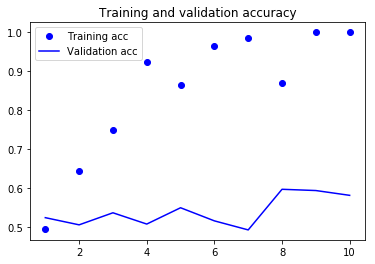

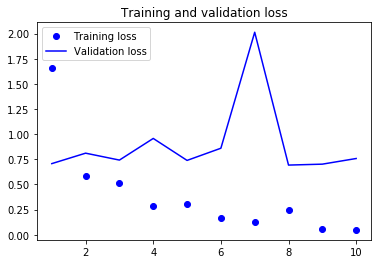

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


The model quickly starts overfitting, unsurprisingly given the small number of training samples. Validation accuracy has high variance for 
the same reason, but seems to reach high 50s.

Note that your mileage may vary: since we have so few training samples, performance is heavily dependent on which exact 200 samples we 
picked, and we picked them at random. If it worked really poorly for you, try picking a different random set of 200 samples, just for the 
sake of the exercise (in real life you don't get to pick your training data).

We can also try to train the same model without loading the pre-trained word embeddings and without freezing the embedding layer. In that 
case, we would be learning a task-specific embedding of our input tokens, which is generally more powerful than pre-trained word embeddings 
when lots of data is available. However, in our case, we have only 200 training samples. Let's try it:

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 6ms/step - loss: 0.7023 - acc: 0.4500 - val_loss: 0.6922 - val_acc: 0.5113
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5125 - a

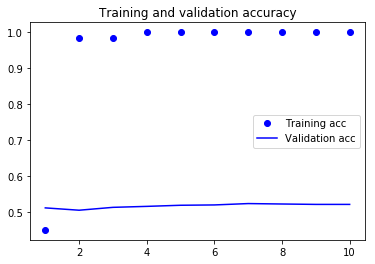

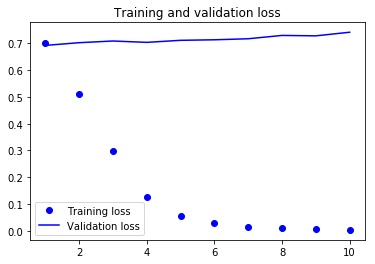

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Validation accuracy stalls in the low 50s. So in our case, pre-trained word embeddings does outperform jointly learned embeddings. If you 
increase the number of training samples, this will quickly stop being the case -- try it as an exercise.

Finally, let's evaluate the model on the test data. First, we will need to tokenize the test data:

In [21]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

And let's load and evaluate the first model:

In [22]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 36us/step


[0.7452680940437317, 0.52084]

We get an appalling test accuracy of 52%. Working with just a handful of training samples is hard!

# Sequence processing with convolutional neural networks (CNN)

Before we turn to Convolutional Neural Networks, let's load the whole dataset:



In [23]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 500  # We will cut reviews after 100 words
training_samples = 20000  # We will be training on 200 samples
validation_samples = 5000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 87393 unique tokens.
Shape of data tensor: (25000, 500)
Shape of label tensor: (25000,)


## Implementing a 1D convnet

In Keras, you would use a 1D convnet via the `Conv1D` layer, which has a very similar interface to `Conv2D`. It takes as input 3D tensors 
with shape `(samples, time, features)` and also returns similarly-shaped 3D tensors. The convolution window is a 1D window on the temporal 
axis, axis 1 in the input tensor.

Let's build a simple 2-layer 1D convnet and apply it to the IMDB sentiment classification task that you are already familiar with.

1D convnets are structured in the same way as their 2D counter-parts that you have used in Chapter 5: they consist of a stack of `Conv1D` 
and `MaxPooling1D` layers, eventually ending in either a global pooling layer or a `Flatten` layer, turning the 3D outputs into 2D outputs, 
allowing to add one or more `Dense` layers to the model, for classification or regression.

One difference, though, is the fact that we can afford to use larger convolution windows with 1D convnets. Indeed, with a 2D convolution 
layer, a 3x3 convolution window contains 3*3 = 9 feature vectors, but with a 1D convolution layer, a convolution window of size 3 would 
only contain 3 feature vectors. We can thus easily afford 1D convolution windows of size 7 or 9.

This is our example 1D convnet for the IMDB dataset:

In [25]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(x_val, y_val))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           22432     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,029,665
Trainable params: 1,029,665
Non-trainable params: 0
_________________________________________________________________


The validation accuracy was pretty good. Let's try it on the test data.

In [27]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

model.evaluate(x_test, y_test)

25000/25000 [==============================] - 11s 422us/step


[0.23737735465973617, 0.81352]

That's a good result!

# You Try

Now it is your turn to try some text classification problems using word embeddings and one dimensional convolutional neural networks. **You can do as many of these as you like**

If you just do the basics you will get the low XP of the range. If you do a bit more (for example, compare gloVe embeddings to ones computed from the corpus) you can get up to the high end. 


## 20 News Group Corpus
#### 35-45xp
This is a classic dataset. You can find it at  [http://qwone.com/~jason/20Newsgroups/](http://qwone.com/~jason/20Newsgroups/). Download the bydate version. The task is to classify newsgroup posts by subject matter. 
## Amazon Electronics Reviews
#### 35-45xp
You can find this dataset at [http://jmcauley.ucsd.edu/data/amazon/](http://jmcauley.ucsd.edu/data/amazon/). One possibility is the electronics review dataset, but if you have your heart set on another, go for it. The reviews are in a loose json format so you will need to do some data munging. The ratings are on a scale of 1-5. I'd like to change those to positive reviews (4 or 5), negative reviews (1 or 2) and mixed (3). 
## Arabic Hotel Reviews
#### 45-60xp
This dataset is available at [https://github.com/hadyelsahar/large-arabic-sentiment-analysis-resouces/tree/master/datasets](https://github.com/hadyelsahar/large-arabic-sentiment-analysis-resouces/tree/master/datasets and the particular dataset I am looking at is HTL.csv. These are reviews written in Arabic. You are trying to predict a positive, negative, or mixed rating.

## Conclusions


Here's what you should take away from this notebook:

* Word Embeddings are a useful representation for text analysis tasks
* When you have a small dataset it might be useful to use pre-existing word embeddings such as GloVe.
* 1d Convnets are the way to go for text classification tasks including sentiment analysis.

## Acknowledgements
This notebook contains many of the code samples and some text from Chapter 3, Section 5 of [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python?a_aid=keras&a_bid=76564dff) by François Chollet. 


#### Remix
Remix by Ron Zacharski. Orginal Python notebook by François Chollet

### MIT License

Copyright (c) 2017 François Chollet

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
